In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-data/student_data.csv


In [30]:
#Hello in this project, we will be Predicting Student Performance Using Machine Learning

In [31]:
#we start with importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [32]:
#Now we load our necessary dataset
df = pd.read_csv('/kaggle/input/student-performance-data/student_data.csv')  
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [33]:
#Now we explore the data looking for data types and missing values

df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [34]:
df.replace(['?', 'NA', 'N/A', 'NaN', ''], np.nan, inplace=True)
df['absences'] = df['absences'].replace(0, np.nan)  

df.isnull().sum()


#we try cleaning the data


school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences      115
G1              0
G2              0
G3              0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Grade Distribution by Gender')

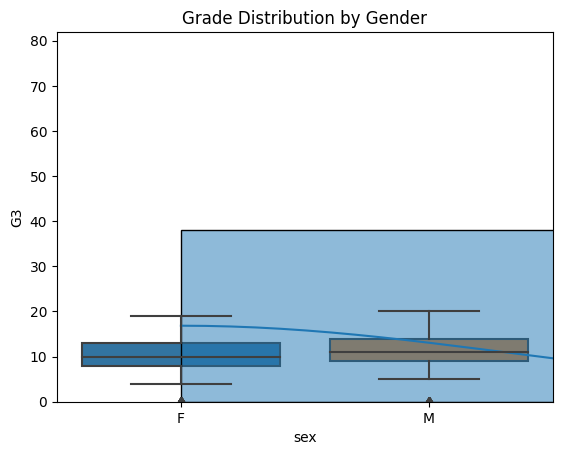

In [35]:
#We try understanding data better by data visualization

sns.histplot(df['G3'], kde=True)
plt.title("Distribution of Final Grades (G3)")

sns.boxplot(x='sex', y='G3', data=df)
plt.title("Grade Distribution by Gender")


In [36]:
#We now perform encode categorical variables

cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [37]:
#We now define features and target
X = df.drop(['G3'], axis=1)  # features
y = df['G3']                 # target


In [38]:
#Here we apply the standard 80-20 rule for testing and training

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [39]:
#feature scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
#We now train the model using an imputer which is used to handle the missing values

from sklearn.impute import SimpleImputer
import numpy as np

# Step 1: Create an imputer (use mean or median)
imputer = SimpleImputer(strategy='mean')  # or strategy='median'

# Step 2: Fit on training data and transform
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Step 3: If you're using test data:
X_test_imputed = imputer.transform(X_test_scaled)

# Step 4: Fit your model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=25)
model.fit(X_train_imputed, y_train.ravel())


/tmp/ipykernel_35/3435138569.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train_imputed, y_train.ravel())


RandomForestRegressor(random_state=25)

In [41]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=25)

# Impute missing values before fitting
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Fit the model
model.fit(X_train_imputed, y_train.ravel())


/tmp/ipykernel_35/2481845116.py:13: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train_imputed, y_train.ravel())


RandomForestRegressor(random_state=25)

In [42]:
#Now we evaluate the model


from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred = model.predict(X_test_imputed)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 4.06
R² Score: 0.80


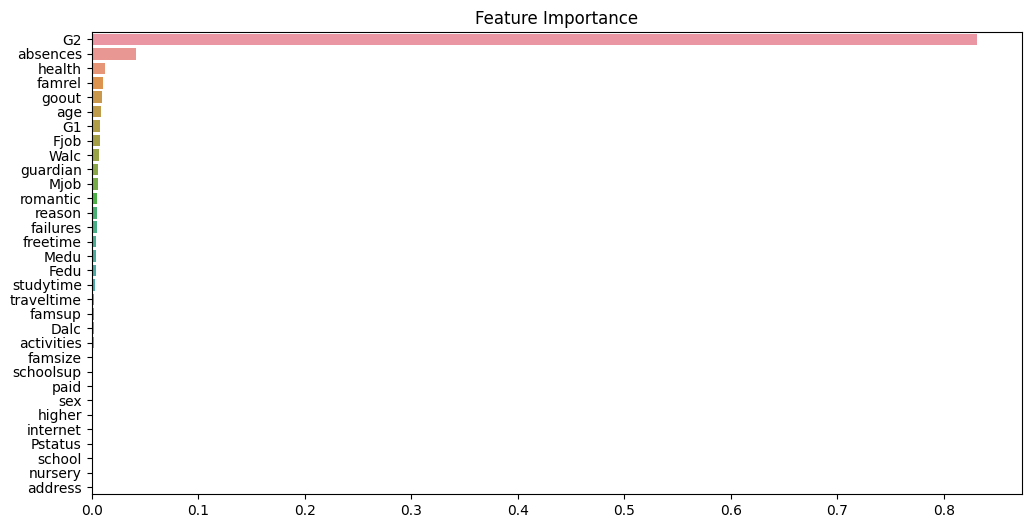

In [43]:
#We check which factors affect student performances the most by plotting graph
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance")
plt.show()

#we can observe that G2 dominates (SECOND PERIOD GRADE) heavily

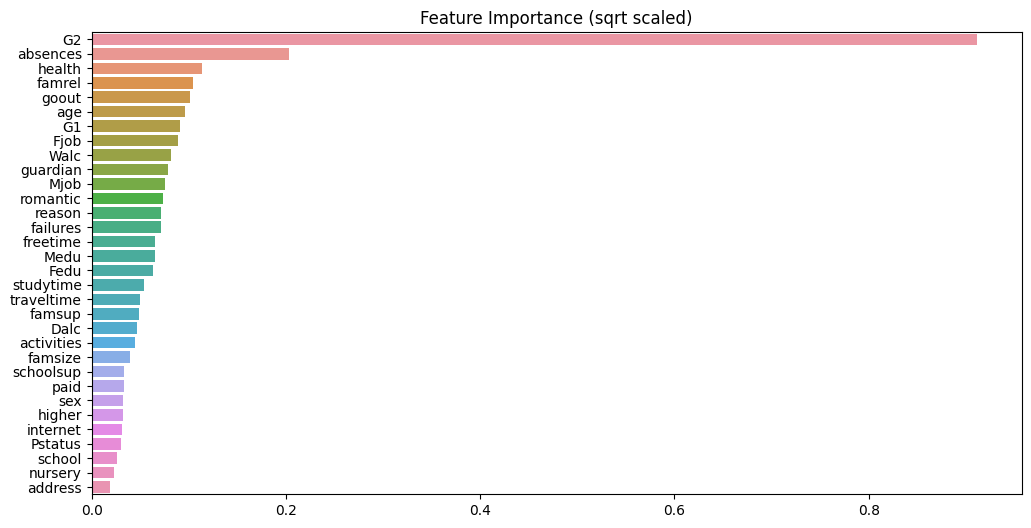

In [44]:
#here we try giving every other factor a chance and the graph to look competitive we simply apply square root scaling method

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Apply sqrt scaling to soften differences
scaled_importances = np.sqrt(importances)

plt.figure(figsize=(12, 6))
sns.barplot(x=scaled_importances[indices], y=features[indices])
plt.title("Feature Importance (sqrt scaled)")
plt.show()


In [45]:
import pandas as pd

# 👉 y_pred: your model's predicted values for G3
# 👉 test_ids: any unique identifier from the test set (optional)
# If no ID column, you can just use range index

submission = pd.DataFrame({
    'Id': range(len(y_pred)),     # or test_df['Id'] if you have one
    'G3': y_pred
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

print("✅ Submission file saved as submission.csv")


✅ Submission file saved as submission.csv
